## Uber Data Analysis Project : 
In this project we shall be conducting an <font color='blue'>'Exploratory Data Analysis'</font> on the data received from <font color='blue'>'Uber Rides'</font>.

<img src="https://www.positivelyosceola.com/wp-content/uploads/2017/11/uber-948x640.jpg" width="400" height="100" align="center"/>

###  Libraries and Packages used : 

In [2]:
#Importing the requisite Libraries and Packages :
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sbn
import datetime as dt
%matplotlib inline

### Importing the Dataset : 

In [3]:
#Reading the .csv data file using pandas into its data structure i.e.'DataFrames':
df=pd.read_csv('Uber Request Data.csv')

### Exploratory Data Analysis : 

In [4]:
#Displaying the first 5 rows of our data stored in the DataFrame:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
#Inspecting the data for the 'Null values' or 'No-value column' :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


<b>Note:</b> Here it seems that some of the columns such as '<b>Driver id</b>' and '<b>Drop Timestamp</b>' have some elements missing, which will be confirmed if we explore the data a little more. 

In [6]:
#Inspecting the last five rows of our data stored in the dataframe:
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


<b>Note:</b> Clearly the bottom rows of the '<b>Driver id</b>' and '<b>Drop timestamp</b>' column show that many elements are missing and we shall further evaluate the number of missing elements in each column.

In [7]:
#Inspecting the number of 'Null elements' in each column:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

### Preparing the data to split the 'Timestamp' into seperate 'Date' and 'Time' column : 

In [8]:
#Replacing the 'NaN' elements of the columns by 'whitespaces' so that they can be split: 
df['Driver id']=df['Driver id'].fillna(' ')
df['Drop timestamp']=df['Drop timestamp'].fillna(' ')

In [9]:
#Splitting the Timestamp data into seperate 'Date' and 'Time' columns:
request_list = [info.split(' ') for info in df['Request timestamp'].tolist()]
drop_list  = [info.split(' ') for info in df['Drop timestamp'].tolist()]

#Saving the 'Newly-created columns' into seperate dataframes:
request  = pd.DataFrame(request_list,columns=['Request Date','Request Time'])
drop = pd.DataFrame(drop_list,columns=['Drop Date','Drop Time'])

#Saving the data of remaining unmodified columns into seperate dataframe:
sub_data = df[['Request id','Pickup point','Driver id','Status']]

#Merging the newly-created columns:
request_drop_merged = pd.concat([request,drop,],axis=1)

In [10]:
#Merging the new columns of Date and Time with the other columns:
df= pd.concat([sub_data,request_drop_merged],axis=1)

In [11]:
#Modified final dataframe:
df.head()

,Request id,Pickup point,Driver id,Status,Request Date,Request Time,Drop Date,Drop Time
0,619,Airport,1,Trip Completed,11/7/2016,11:51,11/7/2016,13:00
1,867,Airport,1,Trip Completed,11/7/2016,17:57,11/7/2016,18:47
2,1807,City,1,Trip Completed,12/7/2016,9:17,12/7/2016,9:58
3,2532,Airport,1,Trip Completed,12/7/2016,21:08,12/7/2016,22:03
4,3112,City,1,Trip Completed,13-07-2016,08:33:16,13-07-2016,09:25:47


<b>Note:</b> Before we move on to further deeper analysis...a superficial observation shows that in the '<b>Request Date</b>' column and '<b>Drop Date</b>' column the dates are not in the similar format('11<b>/</b>7<b>/</b>2016' and '13<b>-</b>07<b>-</b>2016') so lets make this correction as well.

In [12]:
# Converting the dates into similar format :
df['Request Date']=df['Request Date'].str.replace("-","/")
df['Drop Date']=df['Drop Date'].str.replace("-","/")
df.head()

,Request id,Pickup point,Driver id,Status,Request Date,Request Time,Drop Date,Drop Time
0,619,Airport,1,Trip Completed,11/7/2016,11:51,11/7/2016,13:00
1,867,Airport,1,Trip Completed,11/7/2016,17:57,11/7/2016,18:47
2,1807,City,1,Trip Completed,12/7/2016,9:17,12/7/2016,9:58
3,2532,Airport,1,Trip Completed,12/7/2016,21:08,12/7/2016,22:03
4,3112,City,1,Trip Completed,13/07/2016,08:33:16,13/07/2016,09:25:47


### Singular Feature Analysis: 

In [13]:
#Taking 'Pick-Up Point' as the feature, lets check the various classes present in it :  
df['Pickup point'].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

<b>Note:</b> The '<b>Pickup point</b>' feature has only two classes that are, '<b>City</b>' and '<b>Airport</b>' which have almost same frequency or count. 

Text(0, 0.5, 'Class Count')

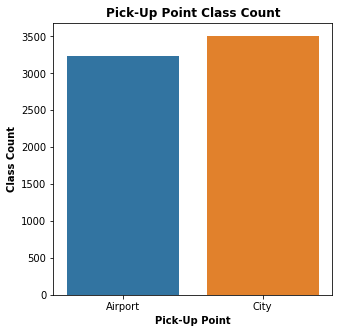

In [14]:
#Graphical representation of 'Pick-Up Point' analysis :
plt.figure(figsize=(5,5))
plt1=sbn.countplot(df['Pickup point'])
plt1.set_title('Pick-Up Point Class Count',weight='bold',fontsize='12')
plt1.set_xlabel('Pick-Up Point',fontweight='bold',fontsize='10')
plt1.set_ylabel('Class Count',fontweight='bold',fontsize='10')

In [21]:
#Taking 'Driver id' as the next feature, lets check the number of rides made by each driver :
rides= df.groupby('Driver id')['Request id'].count() 
rides=rides.reset_index()
rides

,Driver id,Request id
0,1,13
1,2,13
2,3,14
3,4,15
4,5,13
...,...,...
296,297,15
297,298,15
298,299,12
299,300,6


In [16]:
#Taking 'Status' as the next feature,lets check the various classes in it :
df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

<b>Note:</b> The '<b>Status</b>' feature has only three classes that are, '<b>Trip Completed</b>', '<b>No Cars Available </b>'and '<b>Cancelled</b>'. 

Text(0, 0.5, 'Class Count')

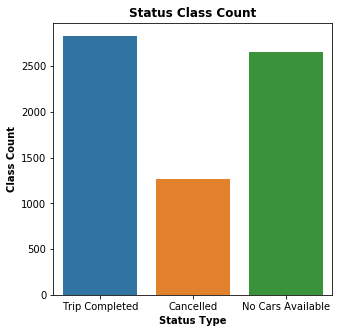

In [17]:
#Graphical representation of 'Status' analysis :
plt.figure(figsize=(5,5))
plt1=sbn.countplot(df['Status'])
plt1.set_title('Status Class Count',weight='bold',fontsize='12')
plt1.set_xlabel('Status Type',fontweight='bold',fontsize='10')
plt1.set_ylabel('Class Count',fontweight='bold',fontsize='10')

In [18]:
#Taking 'Request Date' as the next feature,lets check the number of requests on each date :
df['Request Date'].value_counts()

15/07/2016    1381
11/7/2016     1367
14/07/2016    1353
13/07/2016    1337
12/7/2016     1307
Name: Request Date, dtype: int64

Text(0, 0.5, 'Class Count')

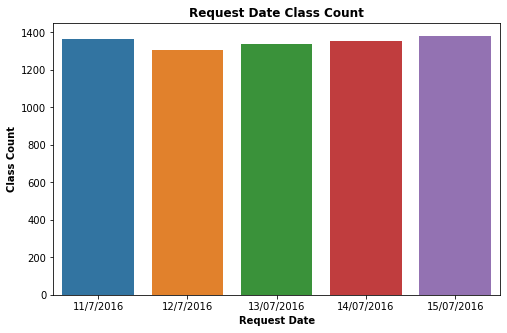

In [19]:
plt.figure(figsize=(8,5))
plt1=sbn.countplot(df['Request Date'])
plt1.set_title('Request Date Class Count',weight='bold',fontsize='12')
plt1.set_xlabel('Request Date',fontweight='bold',fontsize='10')
plt1.set_ylabel('Class Count',fontweight='bold',fontsize='10')

<b>Note:</b> The above graph leads to a conclusion that the highest number of Uber requests have been made on <b>15/07/2016</b> that is <b>Friday</b> which may be due to the end of working week days and onset of weekends;)

In [20]:
df["Request Time"]=pd.to_datetime(df["Request Time"],format="%H:%M:%S %p)
req_time=df["Request Time"]
time_range_list=["6-9","9-12","12-15","15-18","18-21","21-00"]
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.03*height, '%s' % int(height))
time_dic=dict()
for item in time_range_list:
    time_dic[item]=0
for time in req_time.values:
    if time<=9:
        time_dic["6-9"]+=1
    elif time<=12:
        time_dic["9-12"]+=1
    elif time<=15:
        time_dic["12-15"]+=1
    elif time<=18:
               ml_dic["15-18"]+=1
    elif time<=21:
               ml_dic["18-21"]+=1    
    else:
        ml_dic["21-00"]+=1
req_time=pd.Series(time_dic)
req_time.sort_values(inplace=True,ascending=False)
print("Time:\n",req_time)
#figure
rects=plt.bar(range(1,len(req_time.index)+1),req_time.values)
plt.title("Time")
plt.xlabel("Time Range")
plt.ylabel("Number of Rides")
plt.xticks(range(1,len(req_time.index)+1),req_time.index)
plt.grid()
autolabel(rects)
plt.savefig("./ml_dis_fig")
 

SyntaxError: EOL while scanning string literal (<ipython-input-20-89c976f72cb3>, line 1)